In [95]:
import pandas as pd # for data analysis
import numpy as np # for data analysis
import plotly.express as px # to visualize data

In [96]:
#importing data from all 3 years

file_nameone = r"FY19-BusAna.xlsx"
df2019 = pd.read_excel(file_nameone, "Unique People")
file_nametwo = r"FY18-Updated.xlsx"
df2018 = pd.read_excel(file_nametwo, "Unique People")
file_namethree = r"FY17.xlsx"
df2017 = pd.read_excel(file_namethree, "Unique People")

In [97]:
#concatonating the data into one document
df_191817 = [df2019, df2018, df2017]
df_191817concat = pd.concat(df_191817)

In [128]:
#Combining different spellings of Office of Information
df_191817concat["Agency Description"] = np.where((df_191817concat["Agency Description"]).str.contains('M-R: Office of Information'),
                                                  
                                               df_191817concat["Agency Description"].str.split("n", expand=True)[0], df_191817concat["Agency Description"])

In [99]:
#filtering by funded jobs only
df_filtered = df_191817concat[df_191817concat.Funding != "Unfunded"]

In [100]:
#Group the by agency and count of job numbers
df_count = df_filtered.groupby("Agency Description")["Job Number"].agg(["count"]).reset_index()

In [101]:
df_count

,Agency Description,count
0,Board of Elections,15
1,City Council,207
2,Comptroller,312
3,Council Services,18
4,Courts: Circuit Court,380
5,Courts: Orphans' Court,15
6,Employees' Retirement Systems,227
7,Enoch Pratt Free Library,1215
8,Finance,896
9,Fire,5191


In [102]:
#Group by agency and the sum of jobs in that agency that had more than one person in a year
df_morethanone = df_filtered.groupby("Agency Description")["More than One"].sum()

In [103]:
#Merge the two groupings
df_mergeone = pd.merge(df_count, df_morethanone, on = "Agency Description").reset_index()

In [104]:
df_mergeone

,index,Agency Description,count,More than One
0,0,Board of Elections,15,0.0
1,1,City Council,207,42.0
2,2,Comptroller,312,8.0
3,3,Council Services,18,1.0
4,4,Courts: Circuit Court,380,29.0
5,5,Courts: Orphans' Court,15,3.0
6,6,Employees' Retirement Systems,227,6.0
7,7,Enoch Pratt Free Library,1215,85.0
8,8,Finance,896,68.0
9,9,Fire,5191,270.0


In [105]:
#Add a column that calculates the percent of the total jobs that had more than one person in it in a year
df_mergeone["Percent more than one"] = (df_mergeone["More than One"]/df_mergeone["count"])*100

In [106]:
df_mergeone

,index,Agency Description,count,More than One,Percent more than one
0,0,Board of Elections,15,0.0,0.000000
1,1,City Council,207,42.0,20.289855
2,2,Comptroller,312,8.0,2.564103
3,3,Council Services,18,1.0,5.555556
4,4,Courts: Circuit Court,380,29.0,7.631579
5,5,Courts: Orphans' Court,15,3.0,20.000000
6,6,Employees' Retirement Systems,227,6.0,2.643172
7,7,Enoch Pratt Free Library,1215,85.0,6.995885
8,8,Finance,896,68.0,7.589286
9,9,Fire,5191,270.0,5.201310


In [107]:
#sort descending
df_mergeone = df_mergeone.sort_values(by = "Percent more than one", ascending = False)

In [108]:
#Make dataframe only the top 10 worst performing agencies
df_mergeone = df_mergeone.head(10)

In [109]:
df_mergeone

,index,Agency Description,count,More than One,Percent more than one
26,26,M-R: Office of Neighborhoods,10,4.0,40.000000
1,1,City Council,207,42.0,20.289855
5,5,Courts: Orphans' Court,15,3.0,20.000000
29,29,Mayoralty,203,38.0,18.719212
31,31,Office of Civil Rights,58,10.0,17.241379
27,27,M-R: Office of the Inspector General,30,5.0,16.666667
20,20,M-R: Office of CitiStat Operations,14,2.0,14.285714
37,37,State's Attorney,1158,141.0,12.176166
14,14,Law,315,37.0,11.746032
21,21,M-R: Office of Criminal Justice,47,5.0,10.638298


In [110]:
#Graph the the percent more than one
percentmorethanone = px.bar(df_mergeone, x= "Agency Description", y= "Percent more than one")

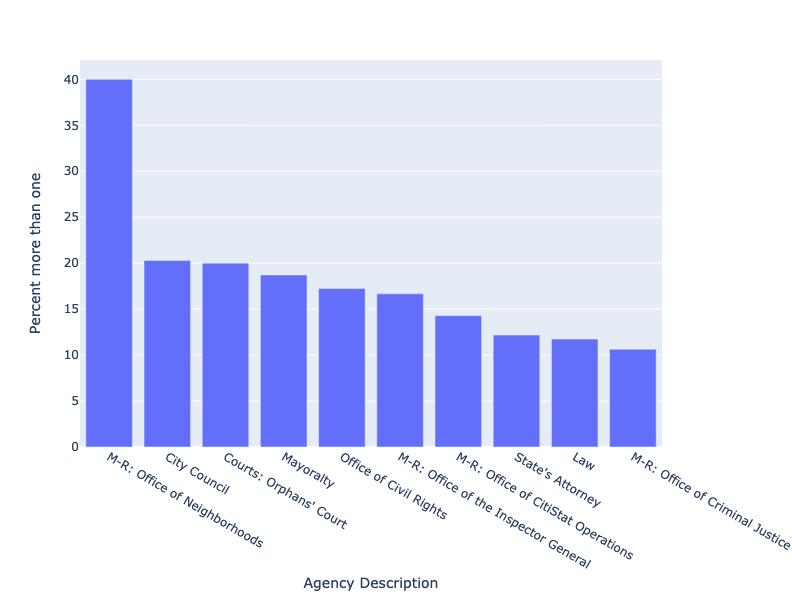

In [111]:
percentmorethanone

In [112]:
#Replace 0s
df_average = df_filtered.replace(0, np.NaN)

In [113]:
#Filter by department and the mean number of unique people per job
df_average = df_average.groupby("Agency Description")["No. Unique People"].mean().reset_index()

In [114]:
df_average

,Agency Description,No. Unique People
0,Board of Elections,1.000000
1,City Council,1.323741
2,Comptroller,1.044199
3,Council Services,1.083333
4,Courts: Circuit Court,1.129167
5,Courts: Orphans' Court,1.300000
6,Employees' Retirement Systems,1.046512
7,Enoch Pratt Free Library,1.108911
8,Finance,1.127400
9,Fire,1.085847


In [115]:
#Find top 10 worst departments
df_average = df_average.sort_values(by = "No. Unique People", ascending = False)
df_average = df_average.head(10)

In [116]:
#Graph Findings
averageup = px.bar(df_average, x= "Agency Description", y= "No. Unique People")

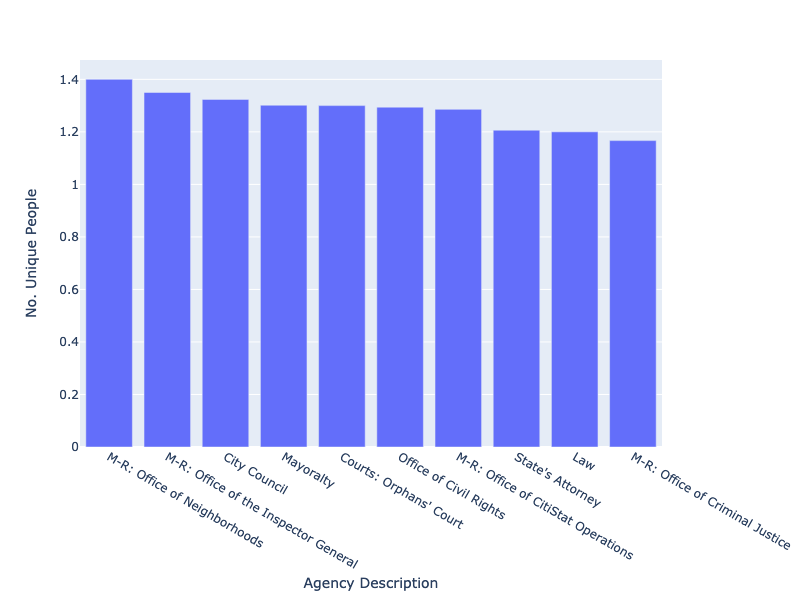

In [117]:
averageup

In [125]:
df_morethanone = df_filtered.groupby("Agency Description")["More than One"].sum().reset_index()
df_morethanone = df_morethanone.sort_values(by = "More than One", ascending = False)
df_morethanone = df_morethanone.head(10)

In [126]:
morethanone = px.bar(df_morethanone, x= "Agency Description", y= "More than One")

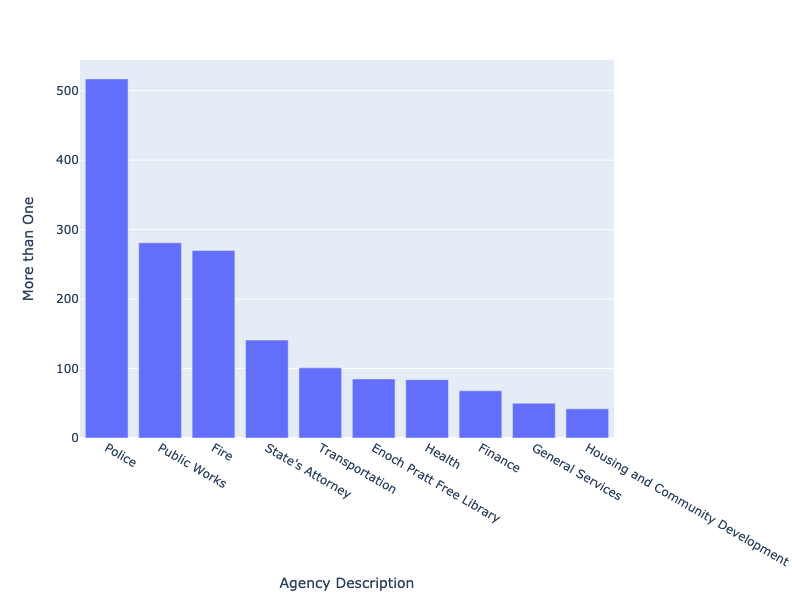

In [127]:
morethanone